In [1]:
#load the saved matrices
import pickle
train_X=pickle.load(open( "di_sc_train_x.p", "rb" ) )
test_X=pickle.load(open( "di_sc_test_x.p", "rb" ) )
train_Y=pickle.load(open( "di_sc_train_y.p", "rb" ) )
test_Y=pickle.load(open( "di_sc_test_y.p", "rb" ) )
mean_arr=pickle.load(open( "di_sc_mean.p", "rb" ) )
mean_std=pickle.load(open( "di_sc_std.p", "rb" ) )

In [2]:
#import keras and numpy
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Dropout
from keras.optimizers import Adam

Using TensorFlow backend.


In [3]:
#this list the devices, just making sure there is a GPU present, you might be fine with no GPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2920069748972406634
]


In [4]:
#model with 2 leyers of 100 LSTM neurons
f_num=56
model = Sequential()
opt=Adam(lr=0.007, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.add(Dense(f_num, input_dim=f_num, kernel_initializer='random_uniform',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
#model.add(Dense(200,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
#model.add(Dense(200,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 56)                3192      
_________________________________________________________________
dropout_1 (Dropout)          (None, 56)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               11400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2010      
Total para

In [5]:
model.fit(train_X, train_Y, epochs=200, batch_size=1000,verbose=1)

Epoch 1/200
25000/25000 [==============================] - 1s 54us/step - loss: 1.6466 - acc: 0.4419
Epoch 2/200
25000/25000 [==============================] - 0s 20us/step - loss: 1.2167 - acc: 0.5954
Epoch 3/200
25000/25000 [==============================] - 1s 22us/step - loss: 1.0887 - acc: 0.6392
Epoch 4/200
25000/25000 [==============================] - 1s 21us/step - loss: 1.0290 - acc: 0.6568
Epoch 5/200
25000/25000 [==============================] - 0s 20us/step - loss: 0.9798 - acc: 0.6734
Epoch 6/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.9377 - acc: 0.6843
Epoch 7/200
25000/25000 [==============================] - 0s 18us/step - loss: 0.9081 - acc: 0.6919
Epoch 8/200
25000/25000 [==============================] - 1s 20us/step - loss: 0.8834 - acc: 0.6979
Epoch 9/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.8744 - acc: 0.6992
Epoch 10/200
25000/25000 [==============================] - 1s 20us/step - loss: 0.8571 - a

25000/25000 [==============================] - 1s 20us/step - loss: 0.6451 - acc: 0.7649
Epoch 82/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.6468 - acc: 0.7688
Epoch 83/200
25000/25000 [==============================] - 1s 22us/step - loss: 0.6548 - acc: 0.7662
Epoch 84/200
25000/25000 [==============================] - 1s 20us/step - loss: 0.6480 - acc: 0.7672
Epoch 85/200
25000/25000 [==============================] - 0s 20us/step - loss: 0.6556 - acc: 0.7656
Epoch 86/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.6468 - acc: 0.7678
Epoch 87/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.6425 - acc: 0.7698
Epoch 88/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.6381 - acc: 0.7709
Epoch 89/200
25000/25000 [==============================] - 1s 20us/step - loss: 0.6410 - acc: 0.7697
Epoch 90/200
25000/25000 [==============================] - 1s 20us/step - loss: 0.6526 - acc: 

In [11]:
scores = model.evaluate(test_X, test_Y, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

675/675 [==============================] - 0s 46us/step
Accuracy: 79.41%


In [12]:
from sklearn.metrics import classification_report


test_Y_index = test_Y.argmax(axis=1) # Convert one-hot to index
test_Y_predicted = model.predict_classes(test_X)
labels_names=["Major capsid","Minor capsid","Baseplate","Major tail","Minor tail","Portal","Tail fiber",
             "Tail shaft","Collar","Head-Tail joining"]
print(classification_report(test_Y_index, test_Y_predicted, target_names=labels_names ))
#print (test_Y_index)

                   precision    recall  f1-score   support

     Major capsid       0.82      0.84      0.83        99
     Minor capsid       0.85      0.89      0.87        37
        Baseplate       0.87      0.88      0.88       117
       Major tail       0.70      0.87      0.77        45
       Minor tail       0.82      0.72      0.77        43
           Portal       0.88      0.83      0.85        88
       Tail fiber       0.69      0.54      0.61        80
       Tail shaft       0.68      0.68      0.68        44
           Collar       0.48      0.58      0.53        43
Head-Tail joining       0.93      0.96      0.94        79

        micro avg       0.79      0.79      0.79       675
        macro avg       0.77      0.78      0.77       675
     weighted avg       0.80      0.79      0.79       675



In [13]:
from collections import Counter
zz=Counter(test_Y_index)
sample_w=[zz[i] for i in range(0,10,1)]
print(zz)
print(sample_w)
print()

Counter({2: 117, 0: 99, 5: 88, 6: 80, 9: 79, 3: 45, 7: 44, 4: 43, 8: 43, 1: 37})
[99, 37, 117, 45, 43, 88, 80, 44, 43, 79]



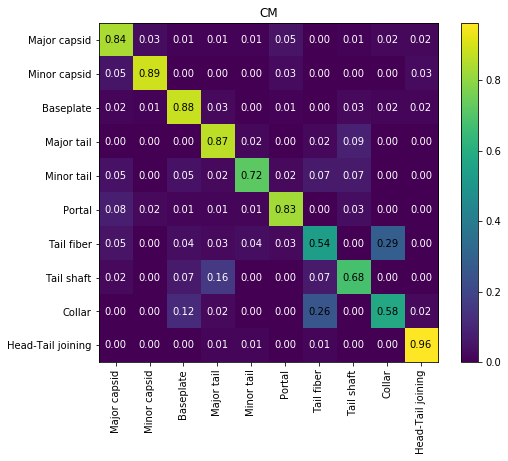

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

CM=confusion_matrix(test_Y_index, test_Y_predicted)
CM_n=CM/numpy.array(sample_w)[:,None]
scale_up=1.3
plt.figure(figsize=[6.4*scale_up, 4.8*scale_up])
plt.imshow(CM_n, interpolation='nearest')
plt.title('CM')
plt.colorbar()
tick_marks = numpy.arange(len(labels_names))
plt.xticks(tick_marks, labels_names, rotation=90)
plt.yticks(tick_marks, labels_names)
fmt = '.2f'
for i, j in itertools.product(range(CM_n.shape[0]), range(CM_n.shape[1])):
        plt.text(j, i, format(CM_n[i, j], fmt),horizontalalignment="center",verticalalignment='center',
                color="white" if CM_n[i, j] < 0.25 else "black")

In [15]:
#you can save the as a file so you dont have to train it every time
model.save('di_sc_model.h5')